In [33]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [34]:
all_df = pd.read_excel("car.xlsx")

In [35]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [36]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [37]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [38]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [39]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1728 train: 1373 test: 355


In [40]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

In [41]:
train_Features[:4]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 1, 0]])

In [42]:
train_Label.shape

(1373,)

In [43]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [44]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [45]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [46]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [47]:
model = Sequential()

In [48]:
model.add(Conv1D(filters=6*3,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(6,1), 
                 activation='relu'))

In [49]:
model.add(MaxPooling1D(pool_size=1))

In [50]:
model.add(Conv1D(filters=6*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [51]:
model.add(MaxPooling1D(pool_size=1))

In [52]:
model.add(Conv1D(filters=6,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [53]:
model.add(MaxPooling1D(pool_size=1))

In [54]:
model.add(Flatten())

In [55]:
model.add(Dense(6, activation='tanh'))

In [56]:
model.add(Dense(4,activation='softmax'))

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 6, 18)             36        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 18)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 12)             228       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 6, 12)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 6, 6)              78        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 6, 6)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36)                0         
__________

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [59]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1)

Train on 1098 samples, validate on 275 samples
Epoch 1/30
1098/1098 [==============================] - 2s 2ms/step - loss: 1.3748 - acc: 0.4053 - val_loss: 1.2865 - val_acc: 0.5745
Epoch 2/30
1098/1098 [==============================] - 0s 358us/step - loss: 1.1206 - acc: 0.7386 - val_loss: 1.1631 - val_acc: 0.5745
Epoch 3/30
1098/1098 [==============================] - 0s 406us/step - loss: 0.8341 - acc: 0.7386 - val_loss: 1.2285 - val_acc: 0.5745
Epoch 4/30
1098/1098 [==============================] - 0s 438us/step - loss: 0.7085 - acc: 0.7386 - val_loss: 1.2844 - val_acc: 0.5745
Epoch 5/30
1098/1098 [==============================] - 0s 427us/step - loss: 0.6765 - acc: 0.7386 - val_loss: 1.3070 - val_acc: 0.5745
Epoch 6/30
1098/1098 [==============================] - 0s 408us/step - loss: 0.6596 - acc: 0.7386 - val_loss: 1.3093 - val_acc: 0.5745
Epoch 7/30
1098/1098 [==============================] - 1s 490us/step - loss: 0.6477 - acc: 0.7386 - val_loss: 1.3106 - val_acc: 0.5745
Epo

In [60]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

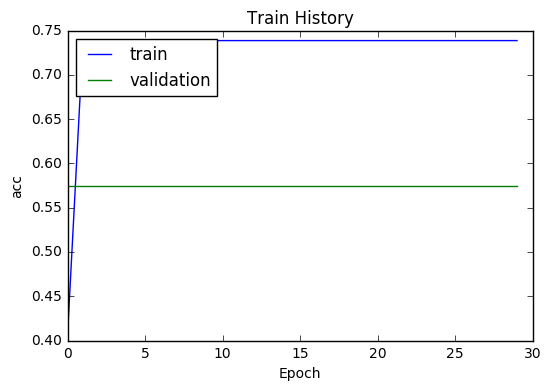

In [61]:
show_train_history(train_history,'acc','val_acc')

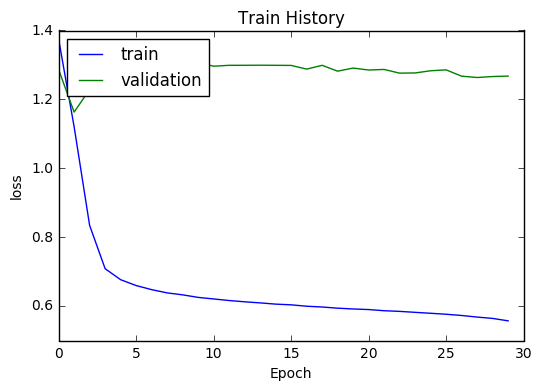

In [62]:
show_train_history(train_history,'loss','val_loss')

In [63]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

355/355 [==============================] - 0s 133us/step


In [64]:
scores[1]

0.6788732395205699